___

<a href='http://www.pieriandata.com'></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# AdaBoost - Адаптивный бустинг

## Данные

<img src="mushroom.jpg" width="100" height="100">

### Идём за грибами: съедобный гриб или ядовитый?

Источник данных: https://archive.ics.uci.edu/ml/datasets/Mushroom


Эти данные содержат описание гипотетических примеров для 23 видов грибов из семейства шампиньоновых (стр. 500-525). Каждый вид характеризуется либо как съедобный, либо как ядовитый, либо неизвестной съедобности (не рекомендуется в пищу). Этот последний класс был объединён с классом ядовитых. Источник явно пишет, что не существует простого правила для определения съедобности гриба.


Информация об атрибутах:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Цель

**Обратите внимание - цель будет не в том, чтобы создать модель предсказания!**

Цель в данной задаче состоит не в создании модели предсказания, а в том, чтобы с помощью машинного обучения и бустинга создать руководство по характеристикам (признакам), на которые нужно обращать внимание при собирании грибов.

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Исследование данных - EDA

<Axes: xlabel='class', ylabel='count'>

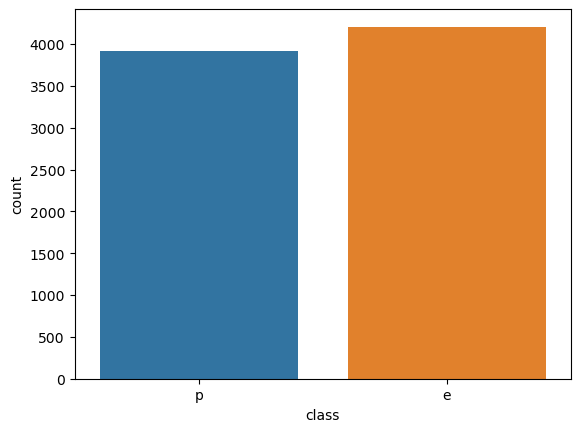

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
df['class'].describe().transpose()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [7]:
df['cap-shape'].unique()


array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [ ]:
df[df['cap-shape'] == 'b'].value_counts()

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

# Разбиение на обучающий и тестовый наборы данных - Train Test Split

In [9]:
X = df.drop('class',axis=1)

In [10]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X

In [ ]:
X[X['cap-surface_s']==0].value_counts()

In [30]:
y = df['class']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Модель

In [33]:
from sklearn.ensemble import AdaBoostClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

1. **estimator**: object, default=None
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is __DecisionTreeClassifier__ initialized with max_depth=1.
2. **n_estimators**: int, default=50
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).

In [35]:
model = AdaBoostClassifier(n_estimators=1)

Если мы зададим _n_estimators=1_ то значит зададим самую простейшую модель (одно дерево решений минимальной глубины, а это решение с использованием одного признака)

In [36]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

## Оценка работы модели

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

In [44]:
predictions = model.predict(X_test)

In [43]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [46]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Т.к. мы использовали простейшую модель,  то у нас и один признак. Как определить какой. Ищем индекс у признака с максимальным аргументом (а он у нас один)

In [47]:
model.feature_importances_.argmax()

22

In [49]:
# Посмотрим на названия признаков
X.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [48]:
X.columns[22]

'odor_n'

Это признак "odor", а буква "n" означает, что у гриба нет запаха.

<Axes: xlabel='odor', ylabel='count'>

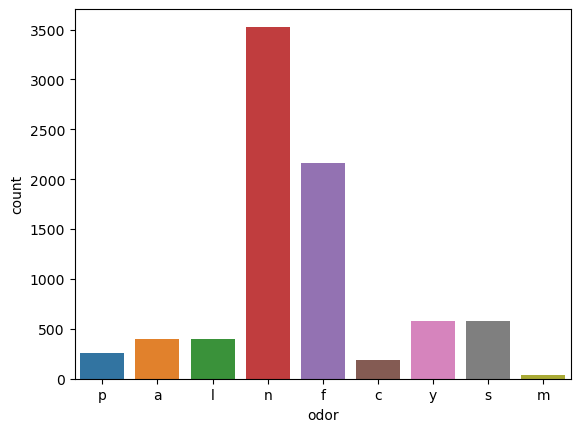

In [50]:
# злесь мы смотрим на исходные данные!!!
sns.countplot(data=df,x='odor')

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
______________________________________
запах: миндальный=a, анисовый=l, креозотовый=c, рыбный=y, неприятный=f, затхлый=m, **отсутствует=n**, острый=p, пряный=s

<AxesSubplot:xlabel='odor', ylabel='count'>

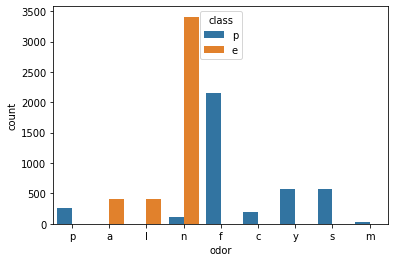

In [23]:
sns.countplot(data=df,x='odor',hue='class')

Как видно, у съедобных грибов в подавляющем к-ве случаев нет запаха.

## Анализ производительности при добавлении weak learners.

Посмотрим сколько у нас признаков

In [51]:
len(X.columns)

95

Напишем процедуру, вычисляющую ошибку в зависимости от к-ва задействованных признаков.

In [53]:
error_rates = []

for n in range(1,40):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

Применим метод локтя

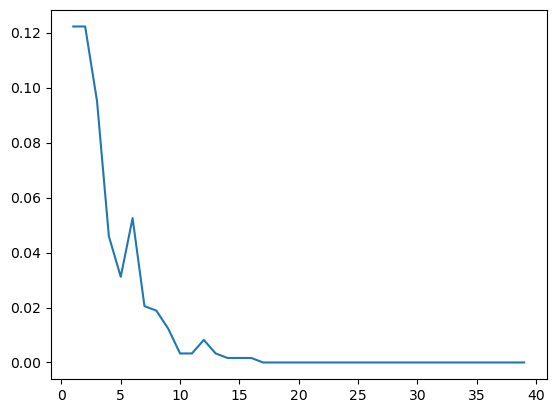

In [54]:
plt.plot(range(1,40),error_rates)

Как мы видим, 20 деревьев уже достаточно

In [55]:
model

AdaBoostClassifier(n_estimators=39)

In [ ]:
model.feature_importances_

Заметим, что с изменением к-ва деревьев, важные признаки будут меняться.

In [57]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [58]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [60]:
imp_feats = feats[feats['Importance']>0]

In [61]:
imp_feats

,Importance
cap-color_w,0.025641
bruises_t,0.025641
odor_c,0.025641
odor_f,0.051282
odor_n,0.051282
odor_p,0.025641
gill-spacing_w,0.076923
gill-size_n,0.102564
stalk-surface-above-ring_k,0.076923
stalk-surface-below-ring_y,0.025641


In [62]:
imp_feats = imp_feats.sort_values("Importance")

In [63]:
imp_feats

,Importance
cap-color_w,0.025641
ring-number_t,0.025641
stalk-surface-below-ring_y,0.025641
odor_p,0.025641
habitat_w,0.025641
odor_c,0.025641
bruises_t,0.025641
odor_f,0.051282
spore-print-color_r,0.051282
odor_n,0.051282


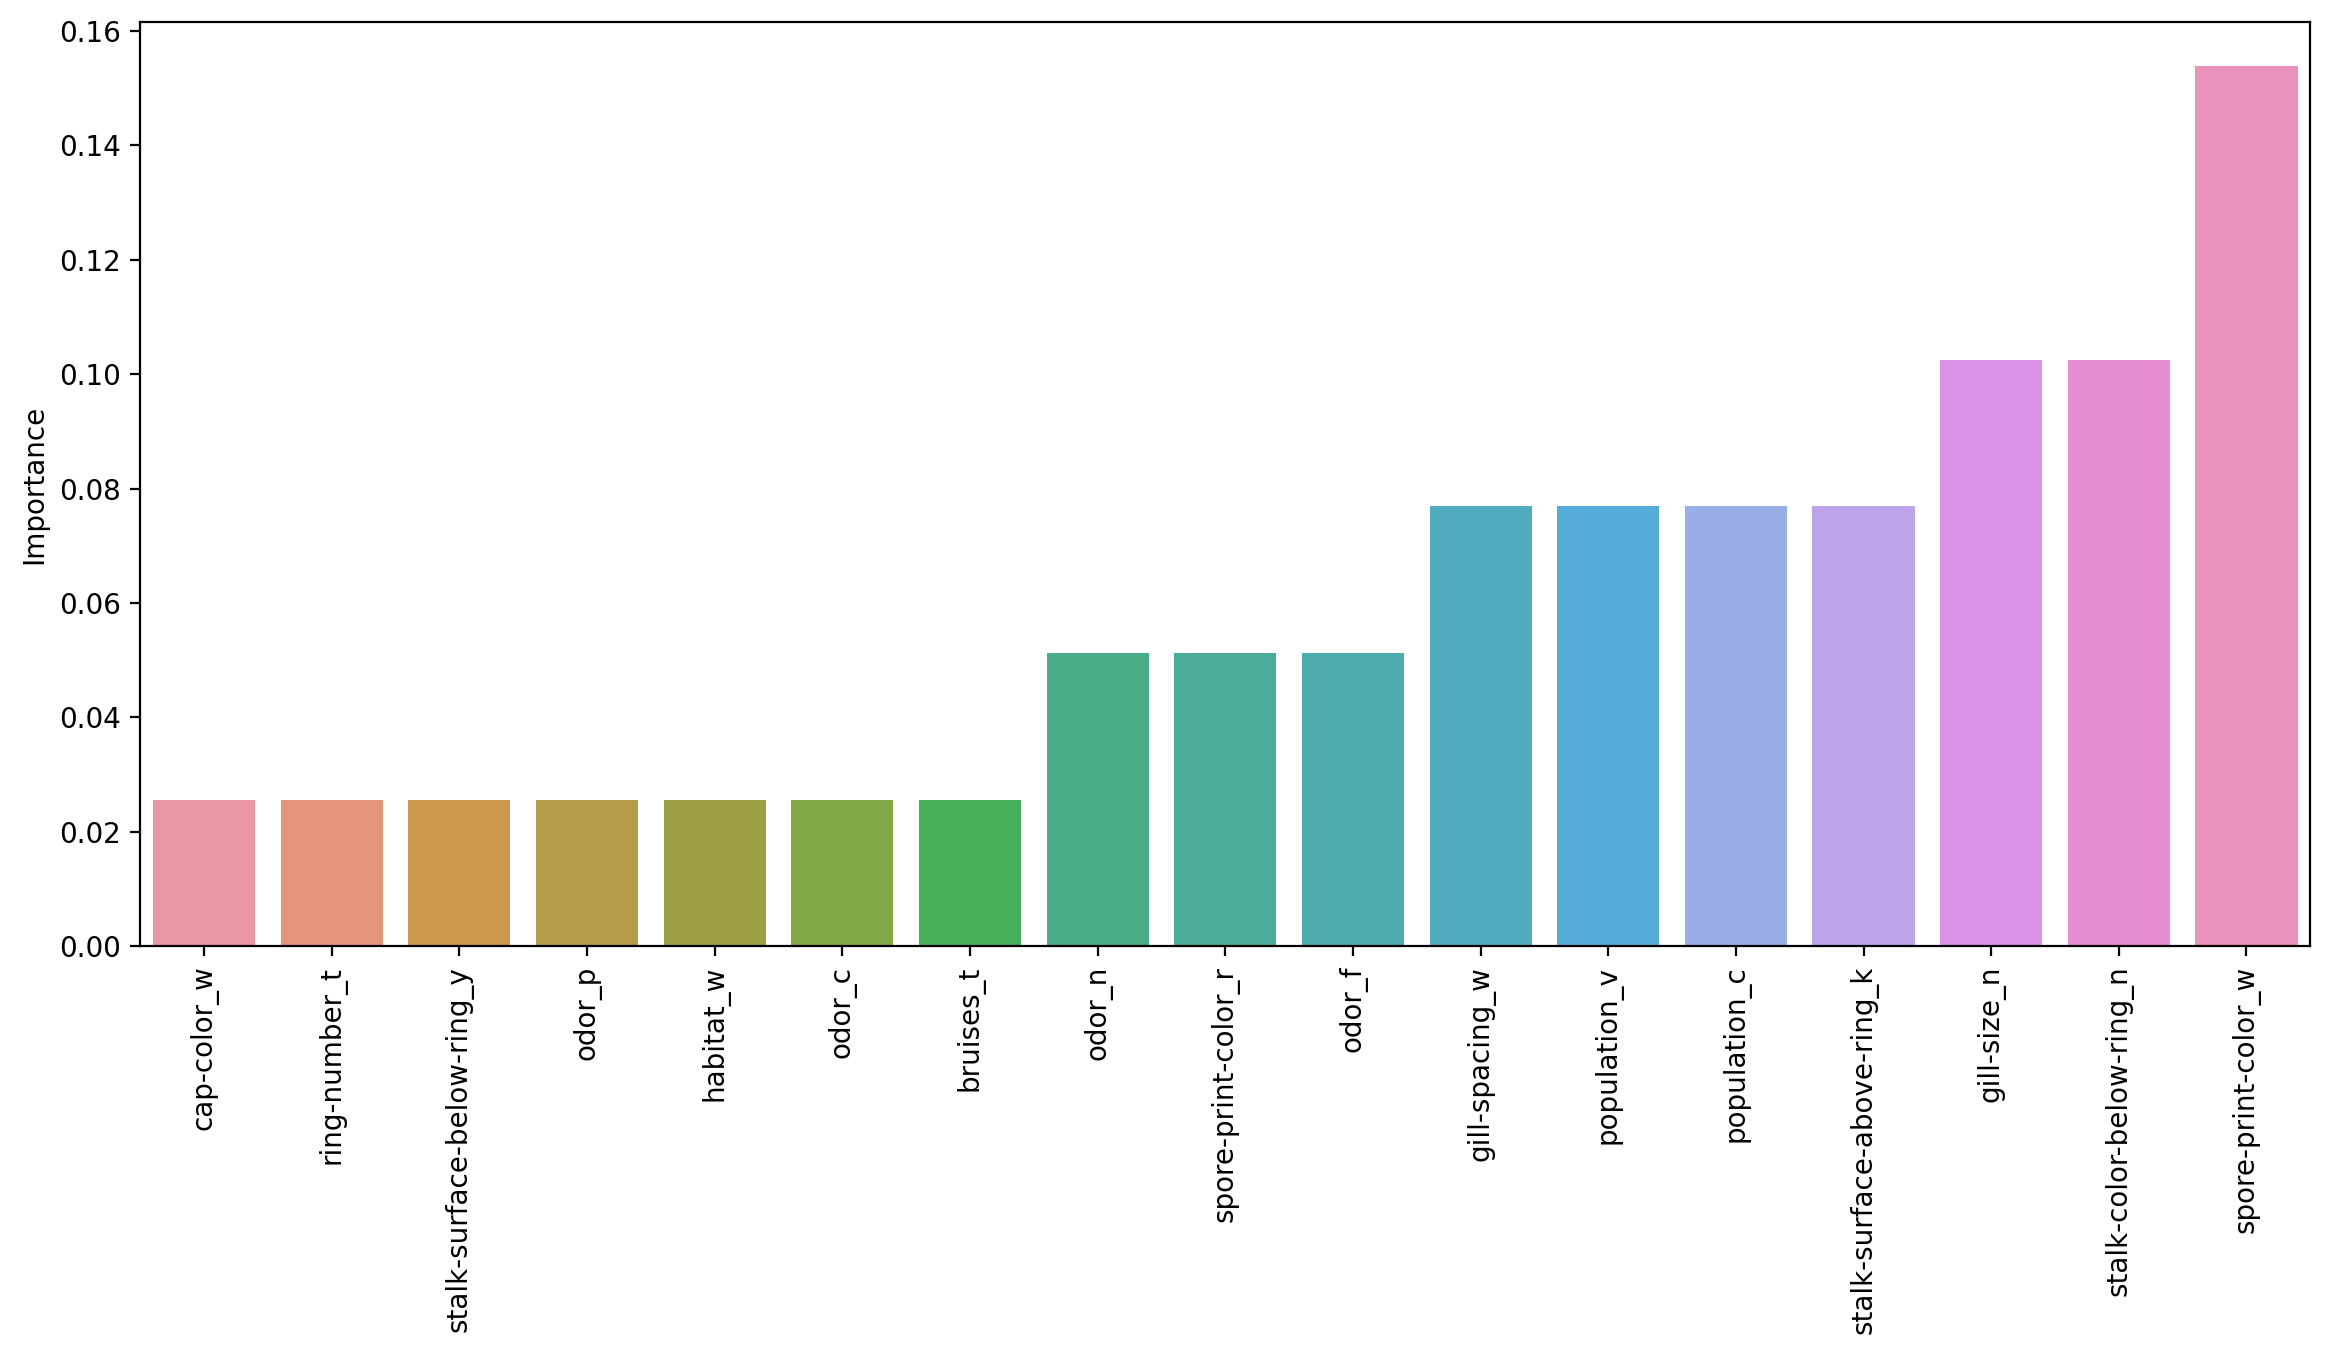

In [64]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

<Axes: xlabel='spore-print-color', ylabel='count'>

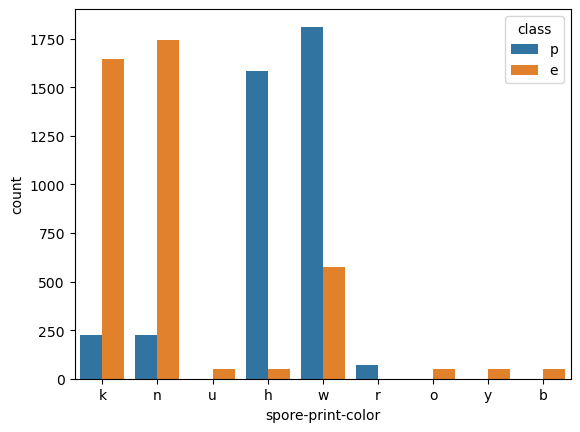

In [66]:
sns.countplot(data=df,x='spore-print-color',hue='class')

Интересно наблюдать, как важность признаков смещается! Однако помните, что это были weak learner, и важность признаков доступна во всех методах на основе деревьев!